In [1]:
import sys
sys.path.insert(1, "../")
from lmtanalysis.FileUtil import getFilesToProcess
import sqlite3
from lmtanalysis.Animal import *
import matplotlib.pyplot as plt
from lmtanalysis.Event import *
from lmtanalysis.Measure import *
from lmtanalysis import BuildEventTrain3, BuildEventTrain4, BuildEventTrain2, BuildEventFollowZone, BuildEventRear5, BuildEventFloorSniffing,\
    BuildEventSocialApproach, BuildEventSocialEscape, BuildEventApproachContact,BuildEventOralOralContact,\
    BuildEventApproachRear, BuildEventGroup2, BuildEventGroup3, BuildEventGroup4, BuildEventOralGenitalContact, \
    BuildEventStop, BuildEventWaterPoint, \
    BuildEventMove, BuildEventGroup3MakeBreak, BuildEventGroup4MakeBreak,\
    BuildEventSideBySide, BuildEventSideBySideOpposite, BuildEventDetection,\
    BuildDataBaseIndex, BuildEventWallJump, BuildEventSAP,\
    BuildEventOralSideSequence, CheckWrongAnimal,\
    CorrectDetectionIntegrity, BuildEventNest4, BuildEventNest3, BuildEventGetAway    
from psutil import virtual_memory
from tkinter.filedialog import askopenfilename
from lmtanalysis.TaskLogger import TaskLogger
import traceback
from lmtanalysis.EventTimeLineCache import flushEventTimeLineCache,\
    disableEventTimeLineCache
from lmtanalysis.EventTimeLineCache import EventTimeLineCached
import pandas as pd
import numpy as np
import time
from datetime import *
import colorsys
from collections import Counter
import seaborn as sns
from lmtanalysis.Util import *
from scripts.InteractionMatrix import *
from dateutil import parser

Code launched.
Enter time information in frame. You can also set in days, hour, minutes
valid entries: 100, 1d, 1.5d, 23.5h, 1d 2h 3m 4s 5f
Starting t : 0
Entry (in frame) : 0
Ending t : 2d
Entry (in frame) : 5184000
Enter file name to save data (.txt will be added) : socialday5004t
Compute profile only during day events (Y or N)? Y
D:/live mouse tracker data/Experiment 5004ter/Experiment 5004ter.sqlite
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:A RFID:000022986578 Genotype:KO User1:None
Animal Id:4 Name:D RFID:000022986503 Genotype:KO User1:None
Animal Id:2 Name:B RFID:000022986558 Genotype:WT User1:None
Animal Id:3 Name:C RFID:000022986531 Genotype:WT User1:None
Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:A RFID:000022986578 Geno

Group 4 make  Id( 4 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 493  records loaded in  7.320655345916748 S )
Caching eventTimeLine
Huddling  Id( 4 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 0  records loaded in  7.328672885894775 S )
Caching eventTimeLine
Move isolated  Id( 4 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 54425  records loaded in  7.658233404159546 S )
Caching eventTimeLine
Move in contact  Id( 4 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 20782  records loaded in  7.4867095947265625 S )
Caching eventTimeLine
Nest3  Id( 4 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 0  records loaded in  7.3066675662994385 S )
Caching eventTimeLine
Nest4  Id( 4 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 0  records loaded in  7.375276327133179 S )
Caching eventTimeLine
Rearing  Id( 4 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 17710  records loaded in  8.107871294

Group3  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 6602  records loaded in  7.3607237339019775 S )
Caching eventTimeLine
Group 3 break  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 2016  records loaded in  7.142274856567383 S )
Caching eventTimeLine
Group 3 make  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 1800  records loaded in  7.134167432785034 S )
Caching eventTimeLine
Group 4 break  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 929  records loaded in  7.133217811584473 S )
Caching eventTimeLine
Group 4 make  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 909  records loaded in  7.138128995895386 S )
Caching eventTimeLine
Huddling  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 0  records loaded in  7.1155478954315186 S )
Caching eventTimeLine
Move isolated  Id( 3 , None , None , None ) Min/maxFrame: ( 0 / 5184000 ) Loaded ( 54748  records loaded 

KeyError: 1

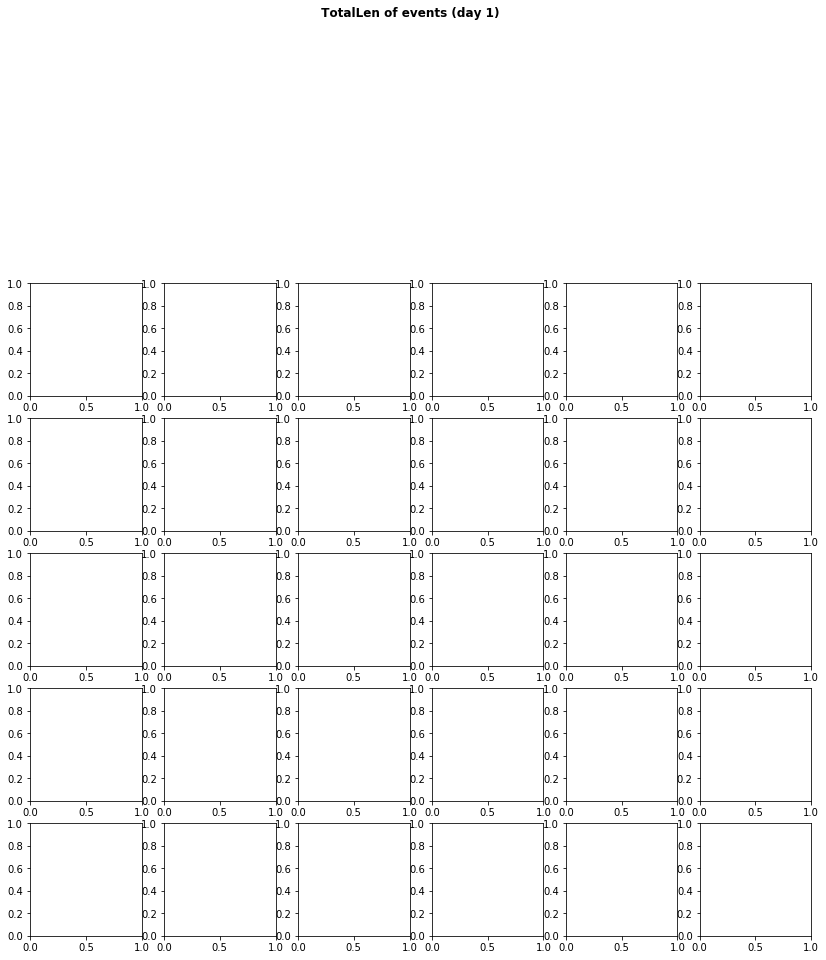

In [7]:
import sys
sys.path.insert(1, "../")

import sqlite3
from lmtanalysis.Animal import *
import numpy as np
import matplotlib.pyplot as plt
from lmtanalysis.Event import *
from lmtanalysis.Measure import *
import colorsys
from collections import Counter
import seaborn as sns

from tkinter.filedialog import askopenfilename
from lmtanalysis.Util import getMinTMaxTAndFileNameInput
from lmtanalysis.EventTimeLineCache import EventTimeLineCached
from lmtanalysis.FileUtil import getFilesToProcess
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas


def computeProfile(file, minT, maxT, day):
    
    connection = sqlite3.connect( file )
    pool = AnimalPool( )
    pool.loadAnimals( connection )
    animalData = {}
    
    for animal in pool.animalDictionnary.keys():
        
        print( "computing individual animal: {}".format( animal ))
        rfid = pool.animalDictionnary[animal].RFID
        print( "RFID: {}".format( rfid ) )
        animalData[rfid]= {}        
        animalData[rfid]["animal"] = pool.animalDictionnary[animal]
        animalData[rfid]["file"] = file
                
        genoA = None
        try:
            genoA=pool.animalDictionnary[animal].genotype
        except:
            pass
                    
        for behavEvent in behaviouralEventOneMouse[:-2]:
            
            #print( "computing individual event: {}".format(behavEvent))    
            behavEventTimeLine = EventTimeLineCached( connection, file, behavEvent, animal, minFrame=minT, maxFrame=maxT )
            totalEventDuration = behavEventTimeLine.getTotalLength()
            nbEvent = behavEventTimeLine.getNumberOfEvent(minFrame = minT, maxFrame = maxT )
            #print( "total event duration: " , totalEventDuration )                
            animalData[rfid][behavEventTimeLine.eventName+" TotalLen"] = totalEventDuration
            animalData[rfid][behavEventTimeLine.eventName+" Nb"] = nbEvent
            #print(behavEventTimeLine.eventName, genoA, behavEventTimeLine.idA, totalEventDuration, nbEvent) 
    header = ["file","strain","sex","group","day","exp","RFID","genotype", "user1", "minTime","maxTime"]
    for name in header:
        text_file.write( "{}\t".format ( name ) ) 
    for kAnimal in animalData:    
        animalData[kAnimal]["experiment"] = file
        COMPUTE_TOTAL_DISTANCE = True
        if ( COMPUTE_TOTAL_DISTANCE == True ):
            animalData[kAnimal]["animal"].loadDetection( start=minT, end=maxT, lightLoad = True )
            animalData[kAnimal]["totalDistance"] = animalData[kAnimal]["animal"].getDistance( tmin=minT,tmax=maxT)/100
        else:
            animalData[kAnimal]["totalDistance"] = "totalDistance"
        
        
    #write event keys
    firstAnimalKey = next(iter(animalData))
    firstAnimal = animalData[firstAnimalKey]
    for k in firstAnimal.keys():
        text_file.write( "{}\t".format( k.replace(" ", "") ) )
    text_file.write("\n")
    
    for kAnimal in animalData:
        text_file.write( "{}\t".format( file ) )
        text_file.write( "{}\t".format( "strain" ) )
        text_file.write( "{}\t".format( "sex" ) )
        text_file.write( "{}\t".format( "group" ) )
        text_file.write( "{}\t".format( day ) )
        text_file.write( "{}\t".format( "exp" ) )
        text_file.write( "{}\t".format( animalData[kAnimal]["animal"].RFID ) )
        text_file.write( "{}\t".format( animalData[kAnimal]["animal"].genotype ) )
        text_file.write( "{}\t".format( animalData[kAnimal]["animal"].user1 ) )
        text_file.write( "{}\t".format( minT ) )
        text_file.write( "{}\t".format( maxT ) )

        for kEvent in firstAnimal.keys():
            text_file.write( "{}\t".format( animalData[kAnimal][kEvent] ) )
        text_file.write( "\n" )
        
    return animalData


def getProfileValues( profileData, day=0, event=None):
    dataDic = {}
    dataDic["genotype"] = []
    dataDic["value"] = []
    dataDic["exp"] = []
    
    for file in profileData.keys():
        for animal in profileData[file][day]:
            dataDic["value"].append(profileData[file][day][animal][event])
            dataDic["exp"].append(profileData[file][day][animal]["experiment"])
            dataDic["genotype"].append(profileData[file][day][animal]["animal"].genotype)
    
    return dataDic


def plotProfileDataDuration(profileData, day, valueCat):
    fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(14, 12))
    
    row=0
    col=0
    fig.suptitle(t="{} of events (day {})".format(valueCat, day), y=1.2, fontweight= 'bold')
    
    #plot the data for each behavioural event
    for behavEvent in behaviouralEventOneMouse[:-2]:
        event = behavEvent+valueCat
        print("event: ", event)
        
        profileValueDictionary = getProfileValues(profileData=profileData, day=day, event=event)
        y = profileValueDictionary["value"]
        x = profileValueDictionary["genotype"]
        genotypeType = Counter(x)
        group = profileValueDictionary["exp"]
        
        print("y: ", y)
        print("x: ", x)
        print("group: ", group)
        experimentType = Counter(group)
        print("Nb of experiments: ", len(experimentType))
        
        axes[row,col].set_xlim(-0.5, 1.5)
        axes[row,col].set_ylim(min(y)-0.2*max(y), max(y)+0.2*max(y))
        sns.stripplot(x, y, jitter=True, hue=group, s=5, ax=axes[row,col] )
        axes[row,col].set_title(behavEvent)
        axes[row,col].set_ylabel("{} (frames)".format(valueCat))
        axes[row,col].legend().set_visible(False)
        axes[row,col].spines['right'].set_visible(False)
        axes[row,col].spines['top'].set_visible(False)
        
        if col<5:
            col+=1
            row=row
        else:
            col=0
            row+=1
    
    #plot the data for the total distance traveled   
    profileValueDictionary = getProfileValues(profileData=profileData, day=day, event="totalDistance")
    y = profileValueDictionary["value"]
    x = profileValueDictionary["genotype"]
    genotypeType = Counter(x)
    group = profileValueDictionary["exp"]
    
    print("y: ", y)
    print("x: ", x)
    print("group: ", group)
    experimentType = Counter(group)
    print("Nb of experiments: ", len(experimentType))
    
    axes[row,col].set_xlim(-0.5, 1.5)
    axes[row,col].set_ylim(min(y)-0.2*max(y), max(y)+0.2*max(y))
    sns.stripplot(x, y, jitter=True, hue=group, s=5, ax=axes[row,col] )
    axes[row,col].set_title("Activity")
    axes[row,col].set_ylabel("total distance (m)")
    axes[row,col].legend().set_visible(False)
    axes[row,col].spines['right'].set_visible(False)
    axes[row,col].spines['top'].set_visible(False)
    
    if col<7:
        col+=1
        row=row
    else:
        col=0
        row+=1
    
    fig.tight_layout()
    figFileName = "FigProfile{}_Events_day_{}.pdf".format( valueCat, day )
    print("Saving " , figFileName )
    fig.savefig( figFileName ,dpi=100)
    plt.close( fig )
    

def testProfileData(profileData=None, day=0, eventListNames=None, valueCat="", text_file=None):
    for behavEvent in eventListNames:
        event = behavEvent+valueCat
        print("event: ", event)
        text_file.write("Test for the event: {} day {}".format( event, day ) )
        
        profileValueDictionary = getProfileValues(profileData=profileData, day=day, event=event)
        
        dfData = pandas.DataFrame({'group': profileValueDictionary["exp"],
                                   'genotype': profileValueDictionary["genotype"],
                                   'value': profileValueDictionary["value"]})
        
        #pandas.DataFrame(dfData).info()
        #Mixed model: variable to explain: value; fixed factor = genotype; random effect: group
        #create model:
        model = smf.mixedlm("value ~ genotype", dfData, groups = dfData["group"])
        #run model: 
        result = model.fit()
        #print summary
        print(result.summary())
        text_file.write(result.summary().as_text())


if __name__ == '__main__':
    
    print("Code launched.")
    
    #List of events to be computed within the behavioural profile, and header for the computation of the total distance travelled.
    behaviouralEventOneMouse = ["Contact", "Oral-oral Contact", "Oral-genital Contact", "Side by side Contact", "Side by side Contact, opposite way", "Social approach", "Get away", "Approach contact", "Approach rear", "Break contact", "FollowZone Isolated", "Train2", "Group2", "Group3", "Group 3 break", "Group 3 make", "Group 4 break", "Group 4 make", "Huddling", "Move isolated", "Move in contact", "Nest3", "Nest4", "Rearing", "Rear isolated", "Rear in contact", "Stop isolated", "WallJump", "Water Zone", "totalDistance", "experiment"]
    #behaviouralEventOneMouse = ["Contact", "totalDistance", "experiment"]

    files = getFilesToProcess()
    tmin, tmax, text_file = getMinTMaxTAndFileNameInput()

    profileData = {}
    dayComputation = input("Compute profile only during day events (Y or N)? ")
    
    for file in files:
        
        print(file)
        connection = sqlite3.connect( file )
    
        profileData[file] = {}
    
        pool = AnimalPool( )
        pool.loadAnimals( connection )

        if dayComputation == "Y":
            minT = tmin
            maxT = tmax
            d = 0
            #Compute profile data and save them in a text file
            profileData[file][d] = computeProfile(file = file, minT=minT, maxT=maxT, day=d)
            text_file.write( "\n" )
            print("Profile data saved.")
            
        else:
            dayEventTimeLine = EventTimeLineCached( connection, file, "day", minFrame=tmin, maxFrame=tmax )
            d = 1
            
            for eventDay in dayEventTimeLine.getEventList():
                minT = eventDay.startFrame
                maxT = eventDay.endFrame
                print("Day: ", d)
                #Compute profile data and save them in a text file
                profileData[file][d] = computeProfile(file=file, minT=minT, maxT=maxT, day=d)
                text_file.write( "\n" )
                d+=1
                print("Profile data saved.")
            
            
    text_file.write( "\n" )
    
    if dayComputation == "N":
        d = 0

        #Plot profile data and save them in a pdf file
        plotProfileDataDuration(profileData=profileData, day=d, valueCat=" TotalLen")
        plotProfileDataDuration(profileData=profileData, day=d, valueCat=" Nb")
        text_file.write( "Statistical analysis: mixed linear models" )
        text_file.write( "{}\n" )
        #Test profile data and save results in a text file
        '''
        testProfileData(profileData=profileData, night=n, eventListNames=behaviouralEventOneMouse[:-2], valueCat=" TotalLen", text_file=text_file)
        testProfileData(profileData=profileData, night=n, eventListNames=behaviouralEventOneMouse[:-2], valueCat=" Nb", text_file=text_file)
        print("test for total distance")
        testProfileData(profileData=profileData, night=n, eventListNames=["totalDistance"], valueCat="", text_file=text_file)
        '''
            
    else:
        dayEventTimeLine = EventTimeLineCached( connection, file, "day", minFrame=tmin, maxFrame=tmax )
        d = 1
        
        for eventDay in dayEventTimeLine.getEventList():

            print("Day: ", d)
               
            #Plot profile data and save them in a pdf file
            plotProfileDataDuration(profileData=profileData, day=d, valueCat=" TotalLen")
            plotProfileDataDuration(profileData=profileData, day=d, valueCat=" Nb")
            text_file.write( "Statistical analysis: mixed linear models" )
            text_file.write( "{}\n" )
            #Test profile data and save results in a text file
            '''
            testProfileData(profileData=profileData, night=n, eventListNames=behaviouralEventOneMouse[:-2], valueCat=" TotalLen", text_file=text_file)
            testProfileData(profileData=profileData, night=n, eventListNames=behaviouralEventOneMouse[:-2], valueCat=" Nb", text_file=text_file)
            print("test for total distance")
            testProfileData(profileData=profileData, night=n, eventListNames=["totalDistance"], valueCat="", text_file=text_file)
            '''
            d+=1
            
    
    print ("Plots saved as pdf and analyses saved in text file.")
    
    text_file.close()


In [10]:
for file in profileData.keys():
    if 'day' in profileValueDictionary:
        print("blah")
    else:
import sys
sys.path.insert(1, "../")        print("boo")

NameError: name 'profileValueDictionary' is not defined

In [2]:
import sys
sys.path.insert(1, "../")

%run ./checkTimeLine.py

Loading animals.
Fields available in lmtanalysis:  ['ID', 'RFID', 'GENOTYPE', 'NAME']
SQL Query: SELECT ID,RFID,NAME,GENOTYPE FROM ANIMAL ORDER BY GENOTYPE
Animal Id:1 Name:A RFID:000022986409 Genotype:HT User1:None
Animal Id:2 Name:B RFID:000022986408 Genotype:HT User1:None
Animal Id:3 Name:C RFID:000022986387 Genotype:WT User1:None
Animal Id:4 Name:D RFID:000022986562 Genotype:WT User1:None
Animal Id:1 Name:A RFID:000022986409 Genotype:HT User1:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM DETECTION WHERE ANIMALID=1 AND FRAMENUMBER>=0 AND FRAMENUMBER<=7776000
Animal Id:1 Name:A RFID:000022986409 Genotype:HT User1:None   2972002  detections loaded in 138.58331274986267 seconds.
Animal Id:2 Name:B RFID:000022986408 Genotype:HT User1:None : Loading detection.
SELECT FRAMENUMBER, MASS_X, MASS_Y, MASS_Z, FRONT_X, FRONT_Y, FRONT_Z, BACK_X, BACK_Y, BACK_Z,REARING,LOOK_UP,LOOK_DOWN FROM D

..\lmtanalysis\Animal.py:592: RuntimeWarning: Mean of empty slice
  threshold = np.nanmean(bodySizeList) + np.nanstd(bodySizeList)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\nanfunctions.py:1666: RuntimeWarning: Degrees of freedom <= 0 for slice.
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3257: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


min:	 5184000 	max:	 7776000 	Animal:	 1 	BT:	  nan 	BS:	 nan
min:	 5184000 	max:	 7776000 	Animal:	 2 	BT:	  nan 	BS:	 nan
min:	 5184000 	max:	 7776000 	Animal:	 3 	BT:	  nan 	BS:	 nan
min:	 5184000 	max:	 7776000 	Animal:	 4 	BT:	  nan 	BS:	 nan
---
**********
min:	 0 	max:	 108000 	Animal:	 1 	BT:	  48.978270341674076 	BS:	 53.32
min:	 0 	max:	 108000 	Animal:	 2 	BT:	  50.95004417254401 	BS:	 53.96
min:	 0 	max:	 108000 	Animal:	 3 	BT:	  48.34241537363401 	BS:	 49.4
min:	 0 	max:	 108000 	Animal:	 4 	BT:	  46.98855018035615 	BS:	 49.76
**********
min:	 108000 	max:	 216000 	Animal:	 1 	BT:	  48.62164740561106 	BS:	 52.0
min:	 108000 	max:	 216000 	Animal:	 2 	BT:	  47.987111010123385 	BS:	 51.6
min:	 108000 	max:	 216000 	Animal:	 3 	BT:	  46.43513912588036 	BS:	 49.68
min:	 108000 	max:	 216000 	Animal:	 4 	BT:	  44.727051295035665 	BS:	 48.0
**********
min:	 216000 	max:	 324000 	Animal:	 1 	BT:	  45.519479887232336 	BS:	 47.08
min:	 216000 	max:	 324000 	Animal:	 2 	BT:	  45.46

min:	 2700000 	max:	 2808000 	Animal:	 1 	BT:	  39.581977491398504 	BS:	 46.92
min:	 2700000 	max:	 2808000 	Animal:	 2 	BT:	  42.79429193865038 	BS:	 48.68
min:	 2700000 	max:	 2808000 	Animal:	 3 	BT:	  41.66075691376081 	BS:	 46.2
min:	 2700000 	max:	 2808000 	Animal:	 4 	BT:	  37.640427416506604 	BS:	 45.32
**********
min:	 2808000 	max:	 2916000 	Animal:	 1 	BT:	  43.79094261548524 	BS:	 48.84
min:	 2808000 	max:	 2916000 	Animal:	 2 	BT:	  36.60830261757252 	BS:	 51.8
min:	 2808000 	max:	 2916000 	Animal:	 3 	BT:	  38.8736520852772 	BS:	 47.6
min:	 2808000 	max:	 2916000 	Animal:	 4 	BT:	  26.210691790181134 	BS:	 26.64
**********
min:	 2916000 	max:	 3024000 	Animal:	 1 	BT:	  38.06342586364038 	BS:	 44.52
min:	 2916000 	max:	 3024000 	Animal:	 2 	BT:	  42.07164746423746 	BS:	 47.6
min:	 2916000 	max:	 3024000 	Animal:	 3 	BT:	  39.81621166376911 	BS:	 50.12
min:	 2916000 	max:	 3024000 	Animal:	 4 	BT:	  42.26519441701037 	BS:	 45.6
**********
min:	 3024000 	max:	 3132000 	Anim

min:	 5508000 	max:	 5616000 	Animal:	 2 	BT:	  nan 	BS:	 nan
min:	 5508000 	max:	 5616000 	Animal:	 3 	BT:	  nan 	BS:	 nan
min:	 5508000 	max:	 5616000 	Animal:	 4 	BT:	  nan 	BS:	 nan
**********
min:	 5616000 	max:	 5724000 	Animal:	 1 	BT:	  nan 	BS:	 nan
min:	 5616000 	max:	 5724000 	Animal:	 2 	BT:	  nan 	BS:	 nan
min:	 5616000 	max:	 5724000 	Animal:	 3 	BT:	  nan 	BS:	 nan
min:	 5616000 	max:	 5724000 	Animal:	 4 	BT:	  nan 	BS:	 nan
**********
min:	 5724000 	max:	 5832000 	Animal:	 1 	BT:	  nan 	BS:	 nan
min:	 5724000 	max:	 5832000 	Animal:	 2 	BT:	  nan 	BS:	 nan
min:	 5724000 	max:	 5832000 	Animal:	 3 	BT:	  nan 	BS:	 nan
min:	 5724000 	max:	 5832000 	Animal:	 4 	BT:	  nan 	BS:	 nan
**********
min:	 5832000 	max:	 5940000 	Animal:	 1 	BT:	  nan 	BS:	 nan
min:	 5832000 	max:	 5940000 	Animal:	 2 	BT:	  nan 	BS:	 nan
min:	 5832000 	max:	 5940000 	Animal:	 3 	BT:	  nan 	BS:	 nan
min:	 5832000 	max:	 5940000 	Animal:	 4 	BT:	  nan 	BS:	 nan
**********
min:	 5940000 	max:	 60480

NameError: name 'quit' is not defined

In [ ]:
import sys
sys.path.insert(1, "../")
from lmtanalysis.FileUtil import getFilesToProcess
import sqlite3
from time import *
from lmtanalysis.Chronometer import Chronometer
from lmtanalysis.Animal import *
from lmtanalysis.Detection import *
from lmtanalysis.Measure import *
import matplotlib.pyplot as plt
import numpy as np
from lmtanalysis.Event import *
from lmtanalysis.Measure import *
from lmtanalysis.EventTimeLineCache import EventTimeLineCached
from lmtanalysis.Util import convert_to_d_h_m_s, getMinTMaxTAndFileNameInput

import networkx as nx

def flush( connection ):
    ''' flush event in database '''
    deleteEventTimeLineInBase(connection, "Nest4_" )
    '''
    could extends to those:
    deleteEventTimeLineInBase(connection, "Nest3" )
    deleteEventTimeLineInBase(connection, "Group2" )
    deleteEventTimeLineInBase(connection, "Group3" )
    deleteEventTimeLineInBase(connection, "Group4" )
    '''


def reBuildEvent( connection, file, tmin, tmax, pool = None ):
    '''
    Nest 3
    Nest 4
    Group 2
    Group 3
    Group 4
    ''' 
    print("[NEST 4] : Assume that there is no occlusion")
    
    if ( pool == None ):
        pool = AnimalPool( )
        pool.loadAnimals( connection )
        pool.loadDetection( start = tmin, end = tmax , lightLoad=True )
    
    # check if given max is more than available detection 
    '''
    maxT = pool.getMaxDetectionT()
    if ( tmax > maxT ):
        tmax = maxT
    '''
    
    #pool.loadDetection( start = tmin, end = tmax )
    
    if ( len ( pool.getAnimalList() ) != 4 ):
        print( "[NEST4 Cancelled] 4 animals are required to build nest 4.")
        return
    
    contact = {}
    
    
    for animal in range( 1 , 5 ):
        for idAnimalB in range( 1 , 5 ):
            if animal != idAnimalB:    
                contact[animal,idAnimalB] = EventTimeLineCached( connection, file, "Contact", animal, idAnimalB, minFrame=tmin, maxFrame=tmax ).getDictionnary() #fait une matrice de tous les contacts à deux possibles
    
    stopDictionnary = {}
        
    for animal in range( 1 , 5 ):
        stopDictionnary[animal] = EventTimeLineCached( connection, file, "Stop", animal, minFrame=tmin, maxFrame=tmax ).getDictionnary()
    
    
    
    '''
    nest3TimeLine = {}
    
    for animal in range( 1 , 5 ):
        nest3TimeLine = EventTimeLine( None, "Nest3" , animal, loadEvent=False )
    '''
    nest4TimeLine = EventTimeLine( None, "Nest4_" , loadEvent=False )
    
    pool.loadAnonymousDetection()
    
    '''
    group2TimeLine = {}
    for animal in range( 1 , 5 ):
        for idAnimalB in range( 1 , 5 ):
            if ( animal != idAnimalB ):
                group2TimeLine[animal,idAnimalB] = EventTimeLine( None, "Group2" , animal , idAnimalB , loadEvent=False )

    group3TimeLine = {}
    for animal in range( 1 , 5 ):
        for idAnimalB in range( 1 , 5 ):
            if( animal != idAnimalB ):
                for idAnimalC in range( 1 , 5 ):
                    if ( animal != idAnimalC and idAnimalB != idAnimalC ):
                        group3TimeLine[animal,idAnimalB] = EventTimeLine( None, "Group3" , animal , idAnimalB , idAnimalC, loadEvent=False )
    
    group4TimeLine = EventTimeLine( None, "Group4" , loadEvent=False )
    '''
        
    
    animalList = pool.getAnimalList() 
    
    result = {}
    
    for t in range( tmin, tmax ):
        
        
        isNest = False
        
        nbAnimalAtT = 0
        animalDetectedList = []
        
        
        anonymousDetectionList = pool.getAnonymousDetection( t )
        
        for animal in animalList:
            if t in animal.detectionDictionnary:                
                animalDetectedList.append( animal )
        
        #print( str(t) + " : " + str( nbAnimalAtT ) )
                    
    
        #print("TEST")
        graph = nx.Graph()
        # add nodes
        
        for animal in animalDetectedList:
            graph.add_node( animal )
            nbAnimalAtT+=1
            
        for animalA in animalDetectedList:
            for animalB in animalDetectedList:
                if animalA != animalB:
                    # add an edge
                    if t in contact[animalA.baseId,animalB.baseId]:
                        graph.add_edge( animalA, animalB )
        
        # check with anonymous detection. Check contact
        if anonymousDetectionList!= None:
            
            nbAnimalAtT+=len(anonymousDetectionList)
            
            # manage anonymous
            #print( t , "manage anonymous")
            '''
            # load all masks
            for animal in animalDetectedList:
                animal.loadMask( t )
            '''
            
            for detectionA in anonymousDetectionList: # anonymous with anonymous
                for detectionB in anonymousDetectionList: # anonymous with anonymous
                    if detectionA != detectionB:
                        distance = detectionA.getDistanceTo( detectionB )
                        if distance != None:
                            if distance < DISTANCE_CONTACT_MASS_CENTER:
                                graph.add_edge( detectionA, detectionB )
                                #print("Adding edge with mask (det anonymous to det anonymous)")
                    
            for detection in anonymousDetectionList:
                for animal in animalDetectedList:
                    distance = detection.getDistanceTo(animal.getDetectionAt( t ) )
                    if distance != None:
                        if distance < DISTANCE_CONTACT_MASS_CENTER:
                            #if detection.getMask().isInContactWithMask( animal.getDetectionAt ( t ).getMask() ):
                            graph.add_edge( animal, detection )
                            #print("Adding edge with mask")
        
        # list of CC from the biggest to the smallest
        #listCC = sorted(nx.connected_components( graph ), key=len, reverse=True)
        
        if nbAnimalAtT == 0:            
            isNest = True
        
        # list of CC from the biggest to the smallest
        listCC = sorted(nx.connected_components( graph ), key=len, reverse=True)
        
        #largestCC = len ( max(nx.connected_components( graph ), key=len) )

        '''
        for animal in animalList:
            if t in animal.detectionDictionnary:
                nbAnimalAtT+=1
                animalDetectedList.append( animal )
        
        #print( str(t) + " : " + str( nbAnimalAtT ) )
        
        if nbAnimalAtT == 0:            
            isNest = True
            
        if not isNest:
            #print("TEST")
            graph = nx.Graph();
            # add nodes
            for animal in animalDetectedList:
                graph.add_node( animal )
            for animalA in animalDetectedList:
                for animalB in animalDetectedList:
                    if animalA != animalB:
                        # add an edge
                        if t in contact[animalA.baseId,animalB.baseId]:
                            graph.add_edge( animalA, animalB )
            
            
            
            
            # check connected components. If the biggest group gets all animal, we got a nest4
            largestCC = len ( max(nx.connected_components( graph ), key=len) )
            
            #print( str( t ) + " : " + str ( len( largestCC ) ) )
            
            #print( str( t ) + " : " + str ( largestCC ) + " / " + str( nbAnimalAtT ) )
        '''    
        if len ( listCC ) == 0 :
            continue
        
        #print( t , len ( listCC[0] ) , nbAnimalAtT )
        
        if len ( listCC[0] ) == nbAnimalAtT:
        
        #if largestCC == nbAnimalAtT :
            
            # check if animals in the nest are stopped.
            allStoppedInBiggestGroup = True
            for animal in animalDetectedList:
                if isinstance( animal , Animal ):
                    if not ( t in stopDictionnary[animal.baseId] ):
                        allStoppedInBiggestGroup = False
                break

            if allStoppedInBiggestGroup:
                isNest= True                     
                     
        if isNest == True:
            #print( "ADD PUNCTUAL")
            result[t] = True;
            
            
            
    nest4TimeLine.reBuildWithDictionnary( result )
    # remove very small events
    nest4TimeLine.removeEventsBelowLength( 2 )
    # merge flashing events
    nest4TimeLine.mergeCloseEvents( 3 )
    nest4TimeLine.endRebuildEventTimeLine(connection)

        
    
    '''
    for animal in range( 1 , 5 ):
        
        for idAnimalB in range( 1 , 5 ):
            if( animal == idAnimalB ):
                continue
            
            for idAnimalC in range( 1 , 5 ):
                if( animal == idAnimalC ):
                    continue
                if( idAnimalB == idAnimalC ):
                    continue
                
                for idAnimalD in range( 1 , 5 ):
                    if( animal == idAnimalD ):
                        continue
                    if( idAnimalB == idAnimalD ):
                        continue
                    if( idAnimalC == idAnimalD ):
                        continue
                
                    eventName = "Group4"        
                    print ( eventName )
                    
                    groupTimeLine = EventTimeLine( None, eventName , animal , idAnimalB , idAnimalC , idAnimalD , loadEvent=False )
                    
                    result={}
                    
                    dicA = contact[ animal ].getDictionnary()
                    dicB = contact[ idAnimalB ].getDictionnary()
                    dicC = contact[ idAnimalC ].getDictionnary()
                    dicD = contact[ idAnimalD ].getDictionnary()
                    
                    dicGroup2A = group2[ animal ].getDictionnary()
                    dicGroup2B = group2[ idAnimalB ].getDictionnary()
                    dicGroup2C = group2[ idAnimalC ].getDictionnary()
                    dicGroup2D = group2[ idAnimalD ].getDictionnary()
                    
                    for t in dicA.keys():
                        if ( t in dicB and t in dicC and t in dicD ):
                            if ( t in dicGroup2A or t in dicGroup2B or t in dicGroup2C or t in dicGroup2D):
                                continue
                            else:
                                result[t]=True
                    
    groupTimeLine.reBuildWithDictionnary( result )
    
    groupTimeLine.endRebuildEventTimeLine(connection)
          
    '''                
        
    # log process
    #from lmtanalysis.TaskLogger import TaskLogger
    #t = TaskLogger( connection )
    #t.addLog( "Build Event Nest4" , tmin=tmin, tmax=tmax )
          
    
    print( "Rebuild event finished." )
        


#chronoFullBatch = Chronometer("Full batch" )    
files = getFilesToProcess()
for file in files:
    tmin, tmax, text_file = getMinTMaxTAndFileNameInput()
    connection = sqlite3.connect( file )
    pool = AnimalPool( )
    pool.loadAnimals( connection )
    reBuildEvent(connection,file,tmin,tmax)
        

In [ ]:
import sqlite3
from time import *

from lmtanalysis.Chronometer import Chronometer
from lmtanalysis.Animal import *
from lmtanalysis.Detection import *
from lmtanalysis.Measure import *
import matplotlib.pyplot as plt
import numpy as np
from lmtanalysis.Event import *
from lmtanalysis.Measure import *
from lmtanalysis.EventTimeLineCache import EventTimeLineCached
import networkx as nx

def flush( connection ):
    ''' flush event in database '''
    deleteEventTimeLineInBase(connection, "Nest3_" )


def reBuildEvent( connection, file, tmin=None, tmax=None , pool = None ):
    '''
    Nest 3
    ''' 
    print("[NEST 3] : Assume that there is no occlusion, does not work with anonymous animals")
    
    if ( pool == None ):
        pool = AnimalPool( )
        pool.loadAnimals( connection )
        pool.loadDetection( start = tmin, end = tmax , lightLoad=True )
        
    if ( len ( pool.getAnimalList() ) != 4 ):
        print( "[NEST3 Cancelled] 4 animals are required to build nest3.")
        return
    
    contact = {}
        
    for idAnimalA in range( 1 , 5 ):
        for idAnimalB in range( 1 , 5 ):
            if idAnimalA != idAnimalB:    
                contact[idAnimalA, idAnimalB] = EventTimeLineCached( connection, file, "Contact", idAnimalA, idAnimalB, minFrame=tmin, maxFrame=tmax ).getDictionnary()

    stopDictionnary = {}
        
    for idAnimalA in range( 1 , 5 ):
        stopDictionnary[idAnimalA] = EventTimeLineCached( 
            connection, file, "Stop", minFrame=tmin, maxFrame=tmax ).getDictionnary()
    
    nest3TimeLine = {}
    
    for idAnimalA in range( 1 , 5 ):
        # the id will be the one excluded from nest.
        nest3TimeLine[idAnimalA] = EventTimeLine( None, "Nest3_" , idA = idAnimalA , loadEvent=False )
    
    pool.loadAnonymousDetection()
    
    animalList = pool.getAnimalList() 
    
    result = {}
    for idAnimalA in range( 1 , 5 ):
        result[idAnimalA] = {}
    
    for t in range( tmin, tmax+1 ):
                
        isNest = False
        
        nbAnimalAtT = 0
        animalDetectedList = []
        
        anonymousDetectionList = pool.getAnonymousDetection( t )
        
        for animal in animalList:
            if t in animal.detectionDictionnary:
                nbAnimalAtT+=1
                animalDetectedList.append( animal )
        
        #print( str(t) + " : " + str( nbAnimalAtT ) )
                    
    
        #print("TEST")
        graph = nx.Graph()
        # add nodes
        for animal in animalDetectedList:
            graph.add_node( animal )
        for animalA in animalDetectedList:
            for animalB in animalDetectedList:
                if animalA != animalB:
                    # add an edge
                    if t in contact[animalA.baseId,animalB.baseId]:
                        graph.add_edge( animalA, animalB )
        
        # check with anonymous detection. Check contact
        if anonymousDetectionList!= None:
            # manage anonymous
            # print( t , "manage anonymous")
            '''
            # load all masks
            for animal in animalDetectedList:
                animal.loadMask( t )
            '''
            
            for detectionA in anonymousDetectionList: # anonymous with anonymous
                for detectionB in anonymousDetectionList: # anonymous with anonymous
                    if detectionA != detectionB:
                        distance = detectionA.getDistanceTo( detectionB )
                        if distance != None:
                            if distance < DISTANCE_CONTACT_MASS_CENTER:
                                graph.add_edge( detectionA, detectionB )
                                # print("Adding edge with mask (det anonymous to det anonymous)")
                    
            for detection in anonymousDetectionList:
                for animal in animalDetectedList:
                    distance = detection.getDistanceTo(animal.getDetectionAt( t ) )
                    if distance != None:
                        if distance < DISTANCE_CONTACT_MASS_CENTER:
                            #if detection.getMask().isInContactWithMask( animal.getDetectionAt ( t ).getMask() ):
                            graph.add_edge( animal, detection )
                            # print("Adding edge with mask")
        
        # list of CC from the biggest to the smallest
        listCC = sorted(nx.connected_components( graph ), key=len, reverse=True)
        
        if ( len( listCC ) == 2 ): # we have 2 groups
            
            # check if animals in the biggest group are stopped.
            allStoppedInBiggestGroup = True
            for animal in list( listCC[0] ):
                if isinstance( animal , Animal ):
                    if not ( t in stopDictionnary[animal.baseId] ):
                        allStoppedInBiggestGroup = False
                        break
                
            if allStoppedInBiggestGroup:
                if ( len( listCC[1] ) == 1 ): # the 2nd group (and the smallest) has only one mouse
                    animal = list(listCC[1])[0]
                    if isinstance( animal , Animal ):                
                        result[ animal.baseId ][ t ] = True
                 
            
    for idAnimalA in range( 1 , 5 ):
            
        # the id will be the one excluded from nest.
        nest3TimeLine[idAnimalA].reBuildWithDictionnary( result[idAnimalA] )
        # remove very small events
        nest3TimeLine[idAnimalA].removeEventsBelowLength( 2 )
        # merge flashing events
        nest3TimeLine[idAnimalA].mergeCloseEvents( 3 )
        nest3TimeLine[idAnimalA].endRebuildEventTimeLine(connection)
        

    
        

#chronoFullBatch = Chronometer("Full batch" )    
files = getFilesToProcess()
for file in files:
    tmin, tmax, text_file = getMinTMaxTAndFileNameInput()
    connection = sqlite3.connect( file )
    pool = AnimalPool( )
    pool.loadAnimals( connection )
    reBuildEvent(connection,file,tmin,tmax)
    print( "Rebuild event finished." )